## Importar librerias

In [1]:
import os
import pandas as pd

## Directorios de los archivos

In [2]:
iar_agencias_path = os.getcwd()+"/caso_prueba_data/iar_agencias.parquet"
iar_empresas_path = os.getcwd()+"/caso_prueba_data/iar_empresas.parquet"
iar_ocupaciones_path = os.getcwd()+"/caso_prueba_data/iar_ocupaciones.parquet"
iar_reservaciones_path = os.getcwd()+"/caso_prueba_data/iar_reservaciones.parquet"
iar_segmentos_mercados_path = os.getcwd()+"/caso_prueba_data/iar_segmentos_mercados.parquet"

In [3]:
iar_agencias = pd.read_parquet(iar_agencias_path)
iar_empresas = pd.read_parquet(iar_empresas_path)
iar_ocupaciones = pd.read_parquet(iar_ocupaciones_path) #, filters=[('cuartos_noche', '!=', 0)])
iar_reservaciones = pd.read_parquet(iar_reservaciones_path)
iar_segmentos_mercados = pd.read_parquet(iar_segmentos_mercados_path)

## Informacion de los archivos

### Informacion de Agencias

In [4]:
iar_agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_Agencia      133 non-null    int64 
 1   Agencia_nombre  133 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
iar_agencias.head()

,ID_Agencia,Agencia_nombre
0,0,PARTICULAR
1,1,"ALCOHOLICOS ANONIMOS ""A.A."" ..."
2,2,HOTELES S.A.
3,3,RESORT ADVANTAGE ...
4,4,BESTDAY - AEROMEXICO ...


In [6]:
iar_agencias.describe(include='object')

,Agencia_nombre
count,133
unique,124
top,HOTELES S.A.
freq,10


In [7]:
repeticion_agencias = iar_agencias['Agencia_nombre'].value_counts()
print(repeticion_agencias[repeticion_agencias > 1])

Agencia_nombre
HOTELES S.A.    10
Name: count, dtype: int64


In [8]:
iar_agencias = iar_agencias['Agencia_nombre'].str.strip().to_dict()

### Informacion de Empresas

In [9]:
iar_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_empresa        7 non-null      int64 
 1   Empresa_nombre    7 non-null      object
 2   Habitaciones_tot  7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes


In [10]:
iar_empresas

,ID_empresa,Empresa_nombre,Habitaciones_tot
0,0,HOTEL 0,283
1,1,HOTEL 1,735
2,2,HOTEL 2,126
3,3,HOTEL 3,196
4,4,HOTEL 4,62
5,5,HOTEL 5,108
6,6,HOTEL 6,154


In [11]:
habitaciones_totales = iar_empresas['Habitaciones_tot'].to_dict()

### Informacion de Segmentos del Mercado

In [12]:
iar_segmentos_mercados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_Segmento_Mercado      6 non-null      int64 
 1   Segmento_Mercado_Nombre  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [13]:
iar_segmentos_mercados

,ID_Segmento_Mercado,Segmento_Mercado_Nombre
0,0,SIN DEFINIR
1,1,COMPLEMENTARIES
2,2,TRANS. ECOMMERCE
3,3,GROUPS & CONVENTIONS
4,4,TRANS. INDIVIDUAL
5,5,TOUR OPERATORS


In [14]:
iar_segmentos_mercados = iar_segmentos_mercados['Segmento_Mercado_Nombre'].str.strip().to_dict()

### Informacion de Ocupaciones

In [15]:
iar_ocupaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fecha_hoy              datetime64[ns]
 1   ID_Agencia             int64         
 2   ID_Tipo_Habitacion     int64         
 3   ingresos_habitaciones  float64       
 4   cuartos_noche          int64         
 5   ADR                    float64       
 6   ID_empresa             int64         
 7   num_adultos            int64         
 8   TREVPEC                float64       
 9   num_menores            int64         
 10  num_infantiles         int64         
 11  num_juniors            int64         
 12  ID_Segmento_Mercado    int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 337.8 MB


In [16]:
iar_ocupaciones.head()

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ingresos_habitaciones,cuartos_noche,ADR,ID_empresa,num_adultos,TREVPEC,num_menores,num_infantiles,num_juniors,ID_Segmento_Mercado
0,2021-11-15,305,13,0.0,0,0.0,4,0,0.0,0,0,0,1
1,2021-11-15,305,14,0.0,0,0.0,4,0,0.0,0,0,0,2
2,2021-11-15,305,14,0.0,0,0.0,1,0,0.0,0,0,0,0
3,2021-11-15,305,14,0.0,0,0.0,2,0,0.0,0,0,0,3
4,2021-11-15,305,19,0.0,0,0.0,3,0,0.0,0,0,0,2


In [17]:
cambios_ocupaciones = {'ID_Tipo_Habitacion': 'category', 'ID_empresa': 'category', 'ID_Segmento_Mercado': 'category'}
iar_ocupaciones = iar_ocupaciones.astype(cambios_ocupaciones)

In [18]:
iar_ocupaciones.describe(include='all')

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ingresos_habitaciones,cuartos_noche,ADR,ID_empresa,num_adultos,TREVPEC,num_menores,num_infantiles,num_juniors,ID_Segmento_Mercado
count,3405916,3.405916e+06,3405916.0,3.405916e+06,3.405916e+06,3.405916e+06,3405916.0,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3405916.0
unique,NaN,NaN,66.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0
top,NaN,NaN,30.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,513008.0,NaN,NaN,NaN,1021409.0,NaN,NaN,NaN,NaN,NaN,1023255.0
mean,2023-01-03 01:15:21.931366912,3.535298e+02,NaN,1.381848e+03,1.043373e+00,8.280428e+02,NaN,2.129918e+00,8.080006e+02,5.497716e-01,3.740961e-02,6.969638e-03,NaN
min,2020-11-01 00:00:00,0.000000e+00,NaN,-1.432951e+05,-1.000000e+00,-7.043207e+04,NaN,-6.000000e+00,-2.307219e+04,-1.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2022-03-27 00:00:00,1.230000e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2023-01-02 00:00:00,2.140000e+02,NaN,1.021703e+02,1.000000e+00,8.980162e+01,NaN,2.000000e+00,8.098600e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,2023-09-05 00:00:00,7.710000e+02,NaN,1.698020e+03,1.000000e+00,1.555120e+03,NaN,2.000000e+00,1.237245e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN
max,2024-12-31 00:00:00,1.052000e+03,NaN,9.926749e+05,2.050000e+02,1.056047e+05,NaN,4.100000e+02,1.037335e+05,1.120000e+02,2.700000e+01,7.000000e+00,NaN


In [19]:
iar_ocupaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fecha_hoy              datetime64[ns]
 1   ID_Agencia             int64         
 2   ID_Tipo_Habitacion     category      
 3   ingresos_habitaciones  float64       
 4   cuartos_noche          int64         
 5   ADR                    float64       
 6   ID_empresa             category      
 7   num_adultos            int64         
 8   TREVPEC                float64       
 9   num_menores            int64         
 10  num_infantiles         int64         
 11  num_juniors            int64         
 12  ID_Segmento_Mercado    category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(6)
memory usage: 269.6 MB


### Informacion de Reservaciones

In [20]:
iar_reservaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_Reserva              203002 non-null  int64         
 1   Fecha_hoy               203002 non-null  datetime64[ns]
 2   fecha_rsvp              203002 non-null  object        
 3   num_personas            203002 non-null  int64         
 4   num_adultos             203002 non-null  int64         
 5   num_menores             203002 non-null  int64         
 6   num_noches              203002 non-null  int64         
 7   total_habitaciones      203002 non-null  int64         
 8   ID_Agencia              203002 non-null  int64         
 9   ID_empresa              203002 non-null  int64         
 10  tipo_habitacion_id      203002 non-null  int64         
 11  fecha_llegada           203002 non-null  object        
 12  fecha_registro          203002

In [21]:
iar_reservaciones = iar_reservaciones[iar_reservaciones['fecha_rsvp'].str.strip() != ""]
iar_reservaciones = iar_reservaciones[iar_reservaciones['fecha_llegada'].str.strip() != ""]
iar_reservaciones = iar_reservaciones[iar_reservaciones['fecha_registro'].str.strip() != ""]
iar_reservaciones = iar_reservaciones[iar_reservaciones['fecha_salida'].str.strip() != ""]
iar_reservaciones['estado_huesped'] = iar_reservaciones['estado_huesped'].str.strip()

In [22]:
cambios_reservaciones = {'fecha_rsvp': 'datetime64[ns]', 'ID_Agencia': 'category', 'ID_empresa': 'category', 'tipo_habitacion_id': 'category', 'fecha_llegada': 'datetime64[ns]', 'fecha_registro': 'datetime64[ns]', 'fecha_salida': 'datetime64[ns]', 'estatus_reservacion_id': 'category', 'estado_huesped': 'category'}
iar_reservaciones = iar_reservaciones.astype(cambios_reservaciones)

In [23]:
iar_reservaciones.head()

,ID_Reserva,Fecha_hoy,fecha_rsvp,num_personas,num_adultos,num_menores,num_noches,total_habitaciones,ID_Agencia,ID_empresa,tipo_habitacion_id,fecha_llegada,fecha_registro,fecha_salida,estatus_reservacion_id,estado_huesped,tarifa_total
0,0,2019-08-16,2019-08-16,2,2,0,3,1,112,4,25,2019-11-07,2019-08-16,2019-11-10,9,EMX,2659.98
1,1,2019-10-22,2019-10-22,4,4,0,4,1,112,4,25,2019-12-01,2019-10-22,2019-12-05,9,EGT,1764.00
2,2,2019-10-28,2019-10-28,2,2,0,4,1,112,1,23,2019-12-01,2019-10-28,2019-12-05,9,EMC,2660.04
3,3,2019-10-28,2019-10-28,4,3,0,3,1,112,4,24,2019-12-08,2019-10-28,2019-12-11,9,EGT,1995.03
4,4,2019-10-28,2019-10-28,2,2,0,4,1,14,2,4,2019-12-08,2019-12-08,2019-12-12,9,EMX,13369.92


In [24]:
iar_reservaciones.describe(include='all')

,ID_Reserva,Fecha_hoy,fecha_rsvp,num_personas,num_adultos,num_menores,num_noches,total_habitaciones,ID_Agencia,ID_empresa,tipo_habitacion_id,fecha_llegada,fecha_registro,fecha_salida,estatus_reservacion_id,estado_huesped,tarifa_total
count,201450.000000,201450,201450,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.0,201450.0,201450.0,201450,201450,201450,201450.0,201450,2.014500e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,5.0,28.0,NaN,NaN,NaN,8.0,148,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,2.0,4.0,NaN,NaN,NaN,9.0,EGR,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31521.0,60162.0,51996.0,NaN,NaN,NaN,131069.0,61523,NaN
mean,101442.454480,2020-02-10 02:48:22.087863296,2019-08-12 10:57:24.634400512,1.185982,1.095150,0.033343,1.681256,0.506791,NaN,NaN,NaN,2019-11-04 14:32:52.682055168,2019-08-16 02:57:47.794489600,2019-11-07 22:11:43.594937088,NaN,NaN,4.100058e+03
min,0.000000,2019-01-02 00:00:00,2019-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2019-02-05 00:00:00,2019-01-02 00:00:00,2019-02-06 00:00:00,NaN,NaN,-3.091000e+04
25%,50712.250000,2019-07-19 00:00:00,2019-04-10 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2019-06-16 00:00:00,2019-04-10 00:00:00,2019-06-19 00:00:00,NaN,NaN,0.000000e+00
50%,101501.500000,2020-02-22 00:00:00,2019-07-19 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,2019-10-18 00:00:00,2019-07-19 00:00:00,2019-10-20 00:00:00,NaN,NaN,0.000000e+00
75%,152210.750000,2020-07-17 18:00:00,2019-12-27 00:00:00,2.000000,2.000000,0.000000,3.000000,1.000000,NaN,NaN,NaN,2020-02-24 00:00:00,2019-12-30 00:00:00,2020-02-28 00:00:00,NaN,NaN,7.592000e+03
max,203001.000000,2021-04-04 00:00:00,2020-04-30 00:00:00,32.000000,15.000000,15.000000,687.000000,6.000000,NaN,NaN,NaN,2021-12-02 00:00:00,2020-07-13 00:00:00,2021-12-05 00:00:00,NaN,NaN,1.033056e+06


In [25]:
iar_reservaciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201450 entries, 0 to 203001
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_Reserva              201450 non-null  int64         
 1   Fecha_hoy               201450 non-null  datetime64[ns]
 2   fecha_rsvp              201450 non-null  datetime64[ns]
 3   num_personas            201450 non-null  int64         
 4   num_adultos             201450 non-null  int64         
 5   num_menores             201450 non-null  int64         
 6   num_noches              201450 non-null  int64         
 7   total_habitaciones      201450 non-null  int64         
 8   ID_Agencia              201450 non-null  category      
 9   ID_empresa              201450 non-null  category      
 10  tipo_habitacion_id      201450 non-null  category      
 11  fecha_llegada           201450 non-null  datetime64[ns]
 12  fecha_registro          201450 non-

## EDA

### Correlaciones

In [26]:
iar_ocupaciones.corr(numeric_only=True)

,ID_Agencia,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC,num_menores,num_infantiles,num_juniors
ID_Agencia,1.000000,-0.028733,-0.012146,-0.061689,-0.011177,-0.082396,-0.057713,0.053240,0.106287
ingresos_habitaciones,-0.028733,1.000000,0.593663,0.514069,0.586875,0.307996,0.368885,0.191002,0.027430
cuartos_noche,-0.012146,0.593663,1.000000,0.178830,0.986919,0.258235,0.606732,0.271661,0.033077
ADR,-0.061689,0.514069,0.178830,1.000000,0.184004,0.606479,0.153045,0.049444,0.039692
num_adultos,-0.011177,0.586875,0.986919,0.184004,1.000000,0.236548,0.597250,0.258797,0.017848
TREVPEC,-0.082396,0.307996,0.258235,0.606479,0.236548,1.000000,0.218253,0.065217,0.109917
num_menores,-0.057713,0.368885,0.606732,0.153045,0.597250,0.218253,1.000000,0.198136,0.007765
num_infantiles,0.053240,0.191002,0.271661,0.049444,0.258797,0.065217,0.198136,1.000000,-0.005961
num_juniors,0.106287,0.027430,0.033077,0.039692,0.017848,0.109917,0.007765,-0.005961,1.000000


In [27]:
iar_reservaciones.corr(numeric_only=True)

,ID_Reserva,num_personas,num_adultos,num_menores,num_noches,total_habitaciones,tarifa_total
ID_Reserva,1.000000,-0.739422,-0.778818,-0.120996,-0.517058,-0.857194,-0.544845
num_personas,-0.739422,1.000000,0.959674,0.380676,0.515688,0.860067,0.532696
num_adultos,-0.778818,0.959674,1.000000,0.206007,0.537924,0.899853,0.567899
num_menores,-0.120996,0.380676,0.206007,1.000000,0.094214,0.135925,0.068580
num_noches,-0.517058,0.515688,0.537924,0.094214,1.000000,0.577600,0.405744
total_habitaciones,-0.857194,0.860067,0.899853,0.135925,0.577600,1.000000,0.617094
tarifa_total,-0.544845,0.532696,0.567899,0.068580,0.405744,0.617094,1.000000


### Exploracion de datos

In [28]:
iar_reservaciones['Fecha_hoy'].dt.day_name()

0            Friday
1           Tuesday
2            Monday
3            Monday
4            Monday
            ...    
202997       Friday
202998    Wednesday
202999     Saturday
203000       Monday
203001       Monday
Name: Fecha_hoy, Length: 201450, dtype: object

In [29]:
display(iar_ocupaciones[(iar_ocupaciones['ID_Agencia']>-1) & (iar_ocupaciones['ingresos_habitaciones']<0) & (iar_ocupaciones['cuartos_noche']<0) & (iar_ocupaciones['TREVPEC']!=0)][['Fecha_hoy', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_empresa', 'ingresos_habitaciones','cuartos_noche','ADR','num_adultos', 'TREVPEC']])

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ID_empresa,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC
666983,2020-11-07,815,3,4,-212.440000,-1,212.440000,-4,53.110
666984,2020-11-07,815,3,2,-10.232549,-1,10.232549,-4,53.110
667108,2020-11-07,803,2,2,-15.348824,-1,15.348824,-6,53.110
667137,2020-11-07,803,2,4,-318.660000,-1,318.660000,-6,53.110
667610,2020-11-08,815,3,4,-212.440000,-1,212.440000,-4,53.110
...,...,...,...,...,...,...,...,...,...
3073193,2024-04-01,803,63,4,-4.307244,-1,4.307244,-4,22.185
3074806,2024-04-02,803,62,3,-39.250000,-1,39.250000,-2,19.625
3074807,2024-04-02,803,62,4,-1.905109,-1,1.905109,-2,19.625
3076675,2024-04-03,803,62,4,-42.660000,-1,42.660000,-2,21.330


In [30]:
#iar_ocupaciones[iar_ocupaciones['cuartos_noche'] < 0]
display(iar_ocupaciones[(iar_ocupaciones['ID_Agencia']>133) & (iar_ocupaciones['ingresos_habitaciones']<1) & (iar_ocupaciones['cuartos_noche']!=0) & (iar_ocupaciones['TREVPEC']<0)][['Fecha_hoy', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_empresa', 'ingresos_habitaciones','cuartos_noche','ADR','num_adultos', 'TREVPEC']])

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ID_empresa,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC
51286,2021-12-02,858,6,2,-3993.811800,2,-1996.905900,4,-21699.677500
51697,2021-12-02,858,6,3,-86798.710000,2,-43399.355000,4,-21699.677500
78947,2021-12-15,157,6,3,-8689.550000,3,-2896.516667,6,-1448.258333
78948,2021-12-15,157,6,2,-410.562249,3,-136.854083,6,-1448.258333
104830,2021-11-11,157,62,4,-6578.970000,1,-6578.970000,2,-3289.485000
...,...,...,...,...,...,...,...,...,...
3337404,2024-09-25,431,61,3,-3.067206,1,-3.067206,2,-30.715000
3341346,2024-09-27,817,58,1,-1174.910000,1,-1174.910000,2,-587.455000
3341347,2024-09-27,817,58,4,-58.418938,1,-58.418938,2,-587.455000
3402057,2024-11-01,821,47,3,-1798.842652,2,-1798.842652,5,-12085.000000


In [31]:
display(iar_ocupaciones[(iar_ocupaciones['ID_Agencia']<134) & (iar_ocupaciones['ingresos_habitaciones']==0)][['Fecha_hoy', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_empresa', 'ingresos_habitaciones','cuartos_noche','ADR','num_adultos', 'TREVPEC']])

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ID_empresa,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC
497,2021-11-15,126,17,2,0.0,0,0.0,0,0.0
499,2021-11-15,99,6,4,0.0,0,0.0,0,0.0
514,2021-11-15,50,9,4,0.0,0,0.0,0,0.0
515,2021-11-15,50,9,0,0.0,0,0.0,0,0.0
517,2021-11-15,126,17,4,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
3405900,2024-11-03,41,64,2,0.0,0,0.0,0,0.0
3405901,2024-11-03,43,16,3,0.0,0,0.0,0,0.0
3405902,2024-11-03,43,16,1,0.0,0,0.0,0,0.0
3405903,2024-11-03,43,17,0,0.0,0,0.0,0,0.0


In [32]:
iar_reservaciones_0 = iar_reservaciones[iar_reservaciones['tarifa_total'] == 0]
print(iar_reservaciones_0['estatus_reservacion_id'].unique())

[2, 9, 5, 3, 1, 4, 8, 7]
Categories (8, int64): [1, 2, 3, 4, 5, 7, 8, 9]


In [33]:
iar_reservaciones_no_0 = iar_reservaciones[iar_reservaciones['tarifa_total'] != 0]
print(iar_reservaciones_no_0['estatus_reservacion_id'].unique())

[9, 2, 5, 3, 4, 1, 7, 8]
Categories (8, int64): [1, 2, 3, 4, 5, 7, 8, 9]


### Agrupar Datos

In [34]:
iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'].dt.year, iar_ocupaciones['ID_Tipo_Habitacion']])['ingresos_habitaciones'].mean()

/tmp/ipykernel_776450/407619119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'].dt.year, iar_ocupaciones['ID_Tipo_Habitacion']])['ingresos_habitaciones'].mean()


Fecha_hoy  ID_Tipo_Habitacion
2020       1                     1567.859525
           2                     2166.414046
           3                     1334.976058
           4                     3062.694915
           5                     1061.597671
                                    ...     
2024       62                     999.964918
           63                    1021.496212
           64                    1124.748916
           65                     581.100021
           66                     665.079823
Name: ingresos_habitaciones, Length: 330, dtype: float64

In [35]:
iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'].dt.day_name(), iar_ocupaciones['ID_empresa']])['cuartos_noche'].sum()

/tmp/ipykernel_776450/1298056740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'].dt.day_name(), iar_ocupaciones['ID_empresa']])['cuartos_noche'].sum()


Fecha_hoy  ID_empresa
Friday     0              51392
           1             104102
           2             156991
           3             105207
           4             103732
Monday     0              51258
           1             101947
           2             154391
           3             104931
           4             103753
Saturday   0              54876
           1             108810
           2             161400
           3             107129
           4             107369
Sunday     0              50224
           1              98770
           2             149414
           3              99085
           4              99113
Thursday   0              48355
           1              97140
           2             145905
           3              98908
           4              97692
Tuesday    0              49982
           1              99135
           2             149788
           3              99676
           4             100755
Wednesday  0      

## Analisis de Ocupacion

### Analisis General

In [36]:
Dias = iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'], iar_ocupaciones['ID_empresa']])['cuartos_noche'].sum()

/tmp/ipykernel_776450/3383335808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Dias = iar_ocupaciones.groupby([iar_ocupaciones['Fecha_hoy'], iar_ocupaciones['ID_empresa']])['cuartos_noche'].sum()


In [37]:
DiasDF=Dias.unstack(level=1)
DiasDF['Cuartos al dia'] = DiasDF.sum(axis=1)
DiasDF['% de Ocupacion 0'] = DiasDF[0]/habitaciones_totales[0]*100
DiasDF['% de Ocupacion 1'] = DiasDF[1]/habitaciones_totales[1]*100
DiasDF['% de Ocupacion 2'] = DiasDF[2]/habitaciones_totales[2]*100
DiasDF['% de Ocupacion 3'] = DiasDF[3]/habitaciones_totales[3]*100
DiasDF['% de Ocupacion 4'] = DiasDF[4]/habitaciones_totales[4]*100

In [38]:
DiasDF

ID_empresa,0,1,2,3,4,Cuartos al dia,% de Ocupacion 0,% de Ocupacion 1,% de Ocupacion 2,% de Ocupacion 3,% de Ocupacion 4
Fecha_hoy,,,,,,,,,,,
2020-11-01,66,235,262,126,179,868,23.321555,31.972789,207.936508,64.285714,288.709677
2020-11-02,62,173,236,157,174,802,21.908127,23.537415,187.301587,80.102041,280.645161
2020-11-03,69,157,234,163,137,760,24.381625,21.360544,185.714286,83.163265,220.967742
2020-11-04,36,114,194,105,125,574,12.720848,15.510204,153.968254,53.571429,201.612903
2020-11-05,80,161,259,192,124,816,28.268551,21.904762,205.555556,97.959184,200.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,319,626,1030,632,585,3192,112.720848,85.170068,817.460317,322.448980,943.548387
2024-12-28,329,614,939,632,654,3168,116.254417,83.537415,745.238095,322.448980,1054.838710
2024-12-29,317,614,866,629,624,3050,112.014134,83.537415,687.301587,320.918367,1006.451613


<Axes: xlabel='Fecha_hoy'>

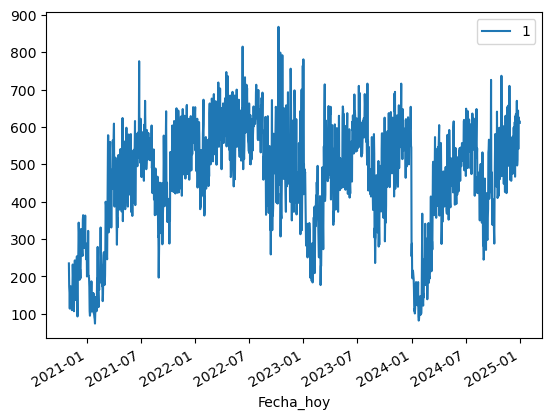

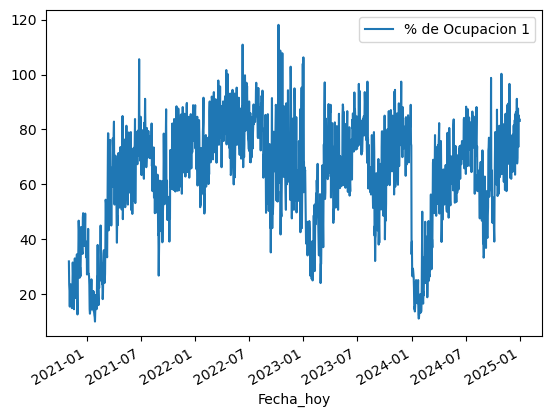

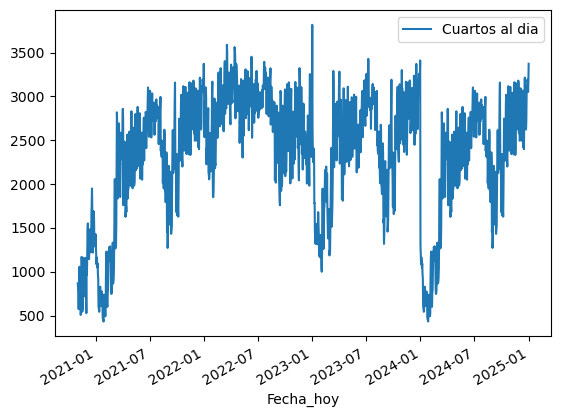

In [39]:
DiasDF.plot.line(y=1)
DiasDF.plot.line(y='% de Ocupacion 1')
DiasDF.plot.line(y='Cuartos al dia')

### Eliminando duplicados

In [40]:
sin_duplicados = iar_ocupaciones.drop_duplicates(['Fecha_hoy', 'ID_Agencia', 'ID_Tipo_Habitacion', 'cuartos_noche', 'ID_empresa'], keep='first')

In [41]:
display(sin_duplicados[(sin_duplicados['cuartos_noche']<0) & (sin_duplicados['ingresos_habitaciones']!=0)][['ID_Agencia', 'ID_Tipo_Habitacion', 'ingresos_habitaciones','cuartos_noche','ADR','num_adultos', 'TREVPEC', 'ID_Segmento_Mercado']])

,ID_Agencia,ID_Tipo_Habitacion,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC,ID_Segmento_Mercado
666983,815,3,-212.440000,-1,212.440000,-4,53.110,4
666984,815,3,-10.232549,-1,10.232549,-4,53.110,2
667108,803,2,-15.348824,-1,15.348824,-6,53.110,3
667137,803,2,-318.660000,-1,318.660000,-6,53.110,4
667610,815,3,-212.440000,-1,212.440000,-4,53.110,2
...,...,...,...,...,...,...,...,...
3073192,803,63,-88.740000,-1,88.740000,-4,22.185,0
3073193,803,63,-4.307244,-1,4.307244,-4,22.185,2
3074806,803,62,-39.250000,-1,39.250000,-2,19.625,1
3074807,803,62,-1.905109,-1,1.905109,-2,19.625,1


In [42]:
sin_duplicados = sin_duplicados[sin_duplicados['cuartos_noche'] > -1]
sin_duplicados['Periodo'] = sin_duplicados['Fecha_hoy'].dt.to_period('Q')

In [43]:
Dias_sin_duplicados = sin_duplicados.groupby([sin_duplicados['Fecha_hoy'], sin_duplicados['ID_empresa']])['cuartos_noche'].sum()

/tmp/ipykernel_776450/3435590985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Dias_sin_duplicados = sin_duplicados.groupby([sin_duplicados['Fecha_hoy'], sin_duplicados['ID_empresa']])['cuartos_noche'].sum()


In [44]:
DiasDF_sin_duplicados=Dias_sin_duplicados.unstack(level=1)
DiasDF_sin_duplicados['Cuartos al dia'] = DiasDF_sin_duplicados.sum(axis=1)
DiasDF_sin_duplicados['% de Ocupacion 0'] = DiasDF_sin_duplicados[0]/habitaciones_totales[0]*100
DiasDF_sin_duplicados['% de Ocupacion 1'] = DiasDF_sin_duplicados[1]/habitaciones_totales[1]*100
DiasDF_sin_duplicados['% de Ocupacion 2'] = DiasDF_sin_duplicados[2]/habitaciones_totales[2]*100
DiasDF_sin_duplicados['% de Ocupacion 3'] = DiasDF_sin_duplicados[3]/habitaciones_totales[3]*100
DiasDF_sin_duplicados['% de Ocupacion 4'] = DiasDF_sin_duplicados[4]/habitaciones_totales[4]*100

In [45]:
DiasDF_sin_duplicados

ID_empresa,0,1,2,3,4,Cuartos al dia,% de Ocupacion 0,% de Ocupacion 1,% de Ocupacion 2,% de Ocupacion 3,% de Ocupacion 4
Fecha_hoy,,,,,,,,,,,
2020-11-01,64,191,233,117,159,764,22.614841,25.986395,184.920635,59.693878,256.451613
2020-11-02,56,163,220,139,166,744,19.787986,22.176871,174.603175,70.918367,267.741935
2020-11-03,62,140,201,150,131,684,21.908127,19.047619,159.523810,76.530612,211.290323
2020-11-04,34,97,157,96,116,500,12.014134,13.197279,124.603175,48.979592,187.096774
2020-11-05,78,141,235,167,107,728,27.561837,19.183673,186.507937,85.204082,172.580645
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,287,519,733,505,450,2494,101.413428,70.612245,581.746032,257.653061,725.806452
2024-12-28,289,508,684,537,503,2521,102.120141,69.115646,542.857143,273.979592,811.290323
2024-12-29,271,489,625,505,496,2386,95.759717,66.530612,496.031746,257.653061,800.000000


<Axes: xlabel='Fecha_hoy'>

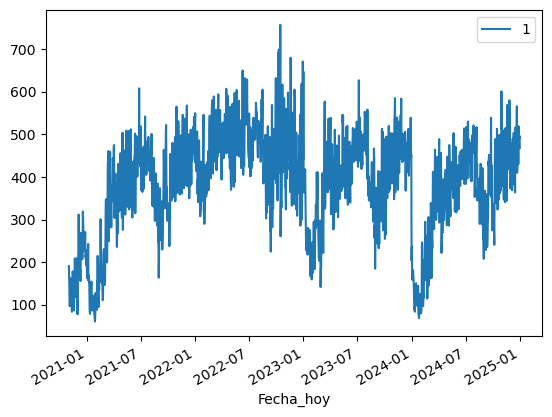

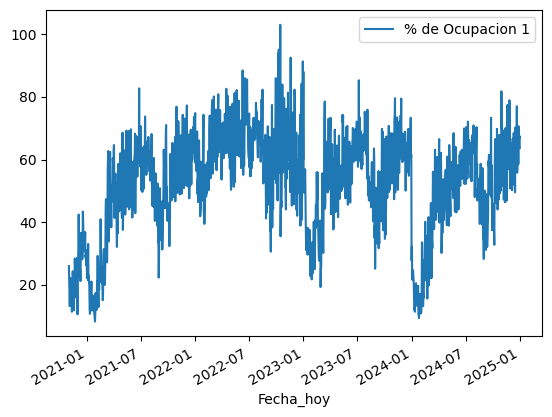

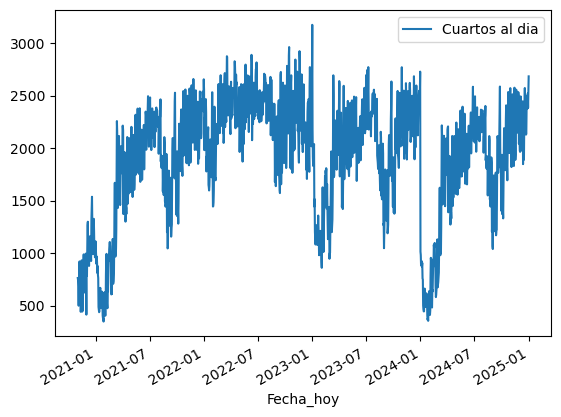

In [46]:
DiasDF_sin_duplicados.plot.line(y=1)
DiasDF_sin_duplicados.plot.line(y='% de Ocupacion 1')
DiasDF_sin_duplicados.plot.line(y='Cuartos al dia')

### Ocupaciones de Nuestras Agencias

In [47]:
iar_ocupaciones_nuestras = sin_duplicados[sin_duplicados['ID_Agencia'] < 133]

In [48]:
iar_ocupaciones_nuestras

,Fecha_hoy,ID_Agencia,ID_Tipo_Habitacion,ingresos_habitaciones,cuartos_noche,ADR,ID_empresa,num_adultos,TREVPEC,num_menores,num_infantiles,num_juniors,ID_Segmento_Mercado,Periodo
496,2021-11-15,125,47,304.993355,1,304.993355,4,2,3120.875000,0,0,0,2,2021Q4
497,2021-11-15,126,17,0.000000,0,0.000000,2,0,0.000000,0,0,0,3,2021Q4
498,2021-11-15,125,39,177.753943,1,177.753943,2,2,1818.885000,0,0,0,2,2021Q4
499,2021-11-15,99,6,0.000000,0,0.000000,4,0,0.000000,0,0,0,2,2021Q4
500,2021-11-15,100,30,223.178860,1,223.178860,4,2,2283.700000,2,0,0,0,2021Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405907,2024-11-03,125,30,6880.060000,2,3440.030000,1,4,1720.015000,0,0,0,2,2024Q4
3405908,2024-11-03,125,30,7224.120000,2,3612.060000,4,4,1806.030000,2,0,0,3,2024Q4
3405912,2024-11-03,126,23,2574.510000,1,2574.510000,4,1,2574.510000,0,0,0,1,2024Q4
3405913,2024-11-03,126,24,286.256340,2,143.128170,2,3,1990.416667,0,0,0,2,2024Q4


In [49]:
Nuestras_ocupaciones = iar_ocupaciones_nuestras.groupby([iar_ocupaciones_nuestras['Fecha_hoy'], iar_ocupaciones_nuestras['ID_empresa']])['cuartos_noche'].sum()

/tmp/ipykernel_776450/2679872460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Nuestras_ocupaciones = iar_ocupaciones_nuestras.groupby([iar_ocupaciones_nuestras['Fecha_hoy'], iar_ocupaciones_nuestras['ID_empresa']])['cuartos_noche'].sum()


In [50]:
Nuestras_ocupacionesDF=Nuestras_ocupaciones.unstack(level=1)
Nuestras_ocupacionesDF['Cuartos al dia'] = Nuestras_ocupacionesDF.sum(axis=1)
Nuestras_ocupacionesDF['% de Ocupacion 0'] = Nuestras_ocupacionesDF[0]/DiasDF_sin_duplicados[0]*100
Nuestras_ocupacionesDF['% de Ocupacion 1'] = Nuestras_ocupacionesDF[1]/DiasDF_sin_duplicados[1]*100
Nuestras_ocupacionesDF['% de Ocupacion 2'] = Nuestras_ocupacionesDF[2]/DiasDF_sin_duplicados[2]*100
Nuestras_ocupacionesDF['% de Ocupacion 3'] = Nuestras_ocupacionesDF[3]/DiasDF_sin_duplicados[3]*100
Nuestras_ocupacionesDF['% de Ocupacion 4'] = Nuestras_ocupacionesDF[4]/DiasDF_sin_duplicados[4]*100
Nuestras_ocupacionesDF['% de Ocupacion 0 real'] = Nuestras_ocupacionesDF[0]/habitaciones_totales[0]*100
Nuestras_ocupacionesDF['% de Ocupacion 1 real'] = Nuestras_ocupacionesDF[1]/habitaciones_totales[1]*100
Nuestras_ocupacionesDF['% de Ocupacion 2 real'] = Nuestras_ocupacionesDF[2]/habitaciones_totales[2]*100
Nuestras_ocupacionesDF['% de Ocupacion 3 real'] = Nuestras_ocupacionesDF[3]/habitaciones_totales[3]*100
Nuestras_ocupacionesDF['% de Ocupacion 4 real'] = Nuestras_ocupacionesDF[4]/habitaciones_totales[4]*100

<Axes: xlabel='Fecha_hoy'>

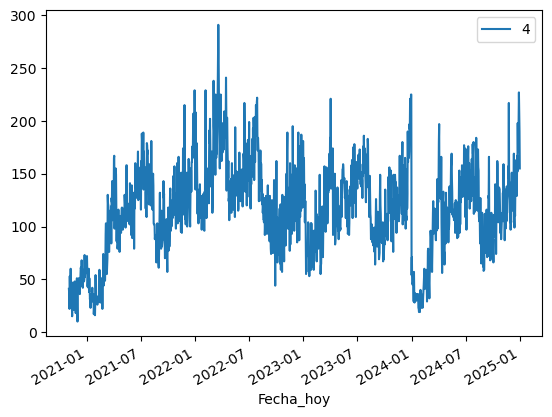

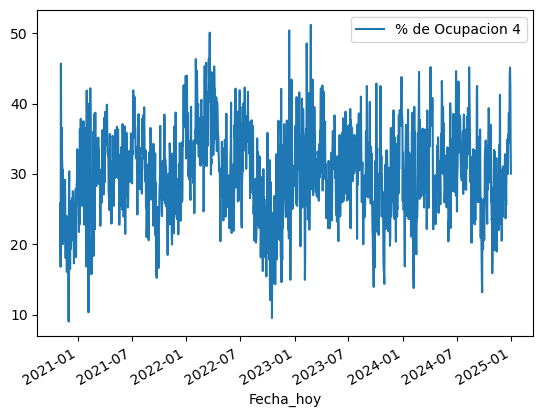

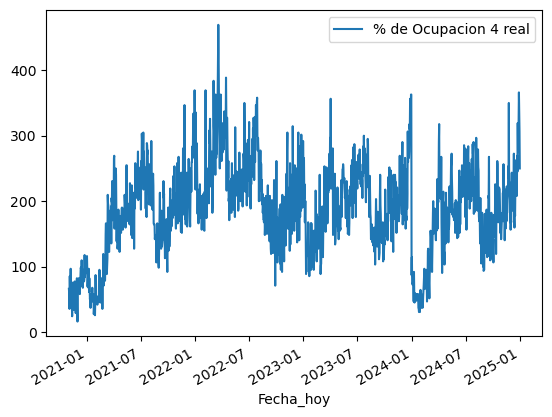

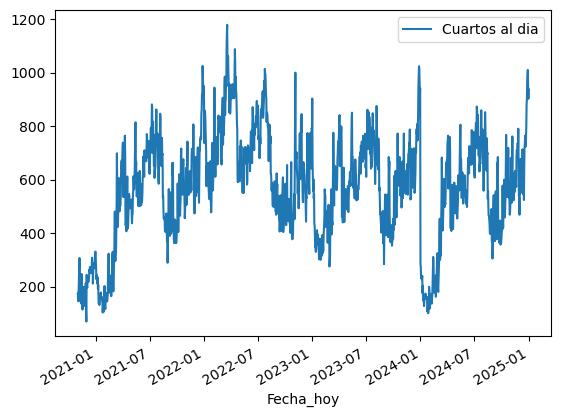

In [51]:
Nuestras_ocupacionesDF.plot.line(y=4)
Nuestras_ocupacionesDF.plot.line(y='% de Ocupacion 4')
Nuestras_ocupacionesDF.plot.line(y='% de Ocupacion 4 real')
Nuestras_ocupacionesDF.plot.line(y='Cuartos al dia')

In [52]:
Nuestras_ocupacionesDF.describe()

ID_empresa,0,1,2,3,4,Cuartos al dia,% de Ocupacion 0,% de Ocupacion 1,% de Ocupacion 2,% de Ocupacion 3,% de Ocupacion 4,% de Ocupacion 0 real,% de Ocupacion 1 real,% de Ocupacion 2 real,% de Ocupacion 3 real,% de Ocupacion 4 real
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,64.882972,114.911243,156.745562,116.249836,115.819855,568.609467,30.858885,29.890529,29.506552,29.973893,30.091940,22.926845,15.634183,124.401240,59.311141,186.806218
std,27.398631,43.352996,57.955896,44.499579,43.533945,201.765288,7.699873,6.131223,5.712350,6.180621,6.269340,9.681495,5.898367,45.996743,22.703867,70.216040
min,9.000000,9.000000,24.000000,13.000000,10.000000,69.000000,6.467662,10.982659,12.712975,10.526316,9.009009,3.180212,1.224490,19.047619,6.632653,16.129032
25%,47.000000,88.000000,122.000000,87.000000,90.000000,445.000000,25.789474,25.837321,25.683891,25.666667,26.011561,16.607774,11.972789,96.825397,44.387755,145.161290
50%,65.000000,116.000000,158.000000,118.000000,116.000000,579.000000,30.877193,29.767442,29.468599,29.773463,29.887218,22.968198,15.782313,125.396825,60.204082,187.096774
75%,81.000000,145.000000,195.000000,147.000000,144.000000,706.000000,35.856574,34.008097,33.333333,34.328358,34.236453,28.621908,19.727891,154.761905,75.000000,232.258065
max,207.000000,256.000000,322.000000,262.000000,291.000000,1180.000000,55.882353,52.054795,45.700637,48.456790,51.202749,73.144876,34.829932,255.555556,133.673469,469.354839


In [53]:
display(iar_ocupaciones_nuestras[(iar_ocupaciones_nuestras['cuartos_noche']>-1) & (iar_ocupaciones_nuestras['ingresos_habitaciones']!=0)][['ID_Agencia', 'ID_Tipo_Habitacion', 'ingresos_habitaciones','cuartos_noche','ADR','num_adultos', 'TREVPEC', 'ID_Segmento_Mercado']])

,ID_Agencia,ID_Tipo_Habitacion,ingresos_habitaciones,cuartos_noche,ADR,num_adultos,TREVPEC,ID_Segmento_Mercado
496,125,47,304.993355,1,304.993355,2,3120.875000,2
498,125,39,177.753943,1,177.753943,2,1818.885000,2
500,100,30,223.178860,1,223.178860,2,2283.700000,0
516,124,24,4426.100000,1,4426.100000,2,2213.050000,0
519,50,6,134.291382,1,134.291382,2,1374.150000,2
...,...,...,...,...,...,...,...,...
3405907,125,30,6880.060000,2,3440.030000,4,1720.015000,2
3405908,125,30,7224.120000,2,3612.060000,4,1806.030000,3
3405912,126,23,2574.510000,1,2574.510000,1,2574.510000,1
3405913,126,24,286.256340,2,143.128170,3,1990.416667,2


In [54]:
Nuestras_ocupacionesDF.nlargest(10, 'Cuartos al dia')

ID_empresa,0,1,2,3,4,Cuartos al dia,% de Ocupacion 0,% de Ocupacion 1,% de Ocupacion 2,% de Ocupacion 3,% de Ocupacion 4,% de Ocupacion 0 real,% de Ocupacion 1 real,% de Ocupacion 2 real,% de Ocupacion 3 real,% de Ocupacion 4 real
Fecha_hoy,,,,,,,,,,,,,,,,
2022-03-20,132,230,312,215,291,1180,42.718447,38.720539,40.310078,37.521815,47.011309,46.643110,31.292517,247.619048,109.693878,469.354839
2022-03-19,107,229,308,248,256,1148,34.516129,40.747331,38.260870,41.891892,42.105263,37.809187,31.156463,244.444444,126.530612,412.903226
2022-03-18,120,249,303,190,231,1093,40.677966,44.703770,41.966759,40.511727,46.385542,42.402827,33.877551,240.476190,96.938776,372.580645
2022-04-15,113,214,311,210,241,1089,36.451613,39.629630,38.159509,37.567084,40.166667,39.929329,29.115646,246.825397,107.142857,388.709677
2022-03-23,152,240,287,194,190,1063,55.072464,46.332046,45.700637,43.595506,42.600897,53.710247,32.653061,227.777778,98.979592,306.451613
2022-03-21,207,184,238,155,265,1049,55.795148,37.096774,36.006051,38.366337,50.094518,73.144876,25.034014,188.888889,79.081633,427.419355
2022-03-22,116,214,298,189,224,1041,45.849802,46.724891,43.188406,40.557940,43.750000,40.989399,29.115646,236.507937,96.428571,361.290323
2022-04-16,150,193,288,201,208,1040,47.770701,31.795717,37.844941,39.960239,39.097744,53.003534,26.258503,228.571429,102.551020,335.483871
2021-12-27,105,182,278,262,199,1026,33.653846,36.111111,43.234837,44.709898,40.283401,37.102473,24.761905,220.634921,133.673469,320.967742


## Ocupaciones dias de la semana

/tmp/ipykernel_776450/3395290206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Dias_Semana = sin_duplicados.groupby([sin_duplicados['Fecha_hoy'].dt.day_name(), sin_duplicados['ID_empresa']])['cuartos_noche'].sum()


<Axes: xlabel='Fecha_hoy'>

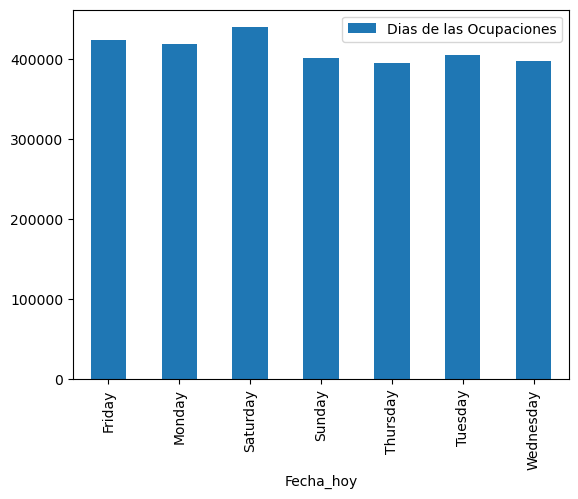

In [55]:
Dias_Semana = sin_duplicados.groupby([sin_duplicados['Fecha_hoy'].dt.day_name(), sin_duplicados['ID_empresa']])['cuartos_noche'].sum()
Dias_SemanaDF=Dias_Semana.unstack(level=1)
Dias_SemanaDF['Dias de las Ocupaciones'] = Dias_SemanaDF.sum(axis=1)
Dias_SemanaDF.plot.bar(y='Dias de las Ocupaciones')

## Ingresos

/tmp/ipykernel_776450/2103994910.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Periodos = sin_duplicados.groupby([sin_duplicados['Periodo'], sin_duplicados['ID_empresa']])['ingresos_habitaciones'].sum()


<Axes: xlabel='Periodo'>

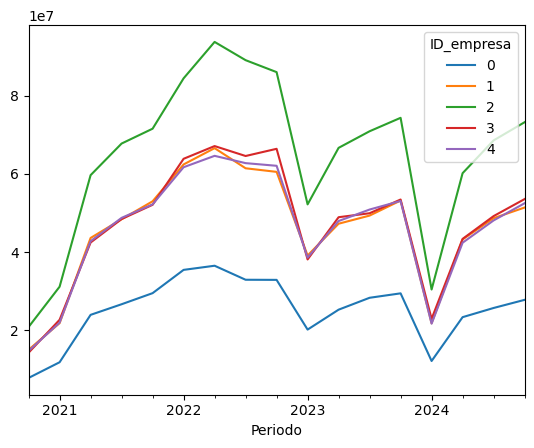

In [56]:
Periodos = sin_duplicados.groupby([sin_duplicados['Periodo'], sin_duplicados['ID_empresa']])['ingresos_habitaciones'].sum()
PeriodosDF=Periodos.unstack(level=1)
PeriodosDF.plot.line()

/tmp/ipykernel_776450/2443267339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Periodos_Cartera = iar_ocupaciones_nuestras.groupby([iar_ocupaciones_nuestras['Periodo'], iar_ocupaciones_nuestras['ID_empresa']])['ingresos_habitaciones'].sum()


<Axes: xlabel='Periodo'>

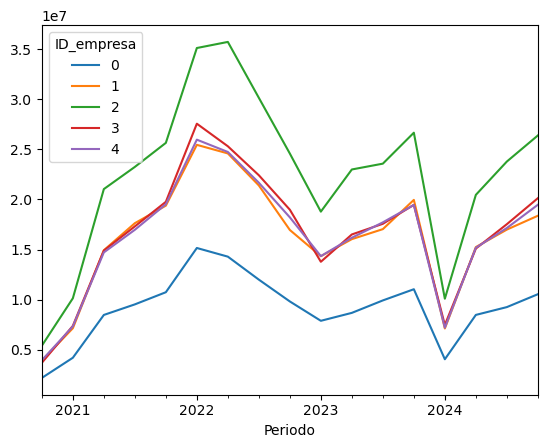

In [57]:
Periodos_Cartera = iar_ocupaciones_nuestras.groupby([iar_ocupaciones_nuestras['Periodo'], iar_ocupaciones_nuestras['ID_empresa']])['ingresos_habitaciones'].sum()
PeriodosDF_Cartera=Periodos_Cartera.unstack(level=1)
PeriodosDF_Cartera.plot.line()

In [58]:
Periodos_Cartera_Agencia = iar_ocupaciones_nuestras.groupby([iar_ocupaciones_nuestras['Periodo'], iar_ocupaciones_nuestras['ID_Agencia']])['ingresos_habitaciones'].sum()
PeriodosDF_Cartera_Agencia=Periodos_Cartera_Agencia.unstack(level=1)

In [59]:
PeriodosDF_Cartera_Agencia.rename(columns=iar_agencias, inplace=True)

In [60]:
PeriodosDF_Cartera_Agencia=PeriodosDF_Cartera_Agencia.T
PeriodosDF_Cartera_Agencia['Total_de_Ganancias']= PeriodosDF_Cartera_Agencia.sum(axis=1)
PeriodosDF_Cartera_Agencia.nlargest(10, 'Total_de_Ganancias')

Periodo,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,Total_de_Ganancias
ID_Agencia,,,,,,,,,,,,,,,,,,
UNIVERSIDAD AUTONOMA DE GUERRERO,4.520564e+06,8.025969e+06,1.591137e+07,2.371287e+07,2.277576e+07,3.453310e+07,2.943049e+07,2.339168e+07,1.297075e+07,1.297166e+07,1.664529e+07,2.328239e+07,2.254504e+07,7.933961e+06,1.599197e+07,2.365734e+07,2.288003e+07,3.211802e+08
QUALITY SERVICES MORELIA,1.778417e+06,3.466909e+06,7.198619e+06,1.042047e+07,1.091204e+07,7.086169e+06,1.574299e+07,1.667464e+07,8.725377e+06,4.305352e+06,7.381888e+06,1.058135e+07,1.094724e+07,3.462557e+06,7.116324e+06,1.055133e+07,1.086832e+07,1.472200e+08
FULL GOSPEL BUSINESS MENS FELLOWSHIP INTERNATIONAL,1.398041e+06,3.935451e+06,1.065276e+07,6.951569e+06,8.416939e+06,1.193477e+07,1.273283e+07,1.120503e+07,1.133221e+07,5.676268e+06,1.103054e+07,7.140435e+06,8.592198e+06,4.042695e+06,1.056999e+07,6.834964e+06,8.535818e+06,1.409825e+08
CLIENTES PARTICULARES,1.160675e+06,3.260136e+06,8.558699e+06,7.254118e+06,6.766702e+06,1.239032e+07,1.296632e+07,8.454533e+06,7.264941e+06,4.041801e+06,8.716288e+06,7.146575e+06,6.801244e+06,3.218589e+06,8.487107e+06,7.220959e+06,6.864812e+06,1.205738e+08
QUALITY SERVICES PUEBLA,2.542503e+05,2.411052e+06,5.139007e+06,7.155578e+06,8.055279e+06,8.126958e+06,5.857176e+06,6.339087e+06,5.370992e+06,5.221807e+06,5.358338e+06,7.470368e+06,8.077564e+06,2.421306e+06,5.162913e+06,7.242986e+06,8.010443e+06,9.767510e+07
HOTELES S.A.,1.481886e+06,2.165917e+06,5.222138e+06,5.996406e+06,7.650134e+06,7.898677e+06,6.735206e+06,5.948149e+06,5.012156e+06,6.009190e+06,5.945648e+06,6.272842e+06,7.689841e+06,2.155879e+06,5.396610e+06,6.095816e+06,7.393589e+06,9.507009e+07
GRUPO LILY´S TOURS / 11-14 DE MAYO 2019 / AZUL,2.901529e+05,8.387451e+05,5.295231e+06,3.629523e+06,6.332634e+06,1.177659e+07,1.084205e+07,7.952109e+06,6.601434e+06,6.075362e+06,5.605382e+06,3.635065e+06,6.271128e+06,8.216685e+05,5.383775e+06,3.639936e+06,6.329388e+06,9.132017e+07
FERNANDO PEREZ (GRUPO FER-PER),3.549729e+05,1.676823e+06,2.569743e+06,3.797867e+06,4.438404e+06,4.843109e+06,7.328380e+06,7.016105e+06,8.436717e+06,7.055732e+06,4.705129e+06,4.520503e+06,4.490252e+06,1.615720e+06,2.658493e+06,3.836460e+06,4.274415e+06,7.361883e+07
GRUPO EQUIPO ZENITH SAN JUAN / 13-16 JUNIO / GRAND,9.943794e+05,6.765946e+05,1.581096e+06,1.640694e+06,2.752762e+06,4.244962e+06,4.312768e+06,3.455027e+06,3.496087e+06,2.698672e+06,1.739605e+06,1.700802e+06,2.783511e+06,6.834296e+05,1.586781e+06,1.641276e+06,2.747319e+06,3.873577e+07


In [61]:
with pd.ExcelWriter('informacion_graficas.xlsx') as writer:  
    DiasDF.to_excel(writer, sheet_name='Dias_Ocupados')
    DiasDF_sin_duplicados.to_excel(writer, sheet_name='Dias_Ocupados_Unicos')
    Nuestras_ocupacionesDF.to_excel(writer, sheet_name='Dias_Ocupados_Agencias')
    PeriodosDF.to_excel(writer, sheet_name='Periodos_de_Ingresos')
    PeriodosDF_Cartera.to_excel(writer, sheet_name='Periodos_de_Ingresos_Agencias')
    PeriodosDF_Cartera_Agencia.to_excel(writer, sheet_name='Periodos_de_Ingresos_por_Agencias')

/home/ozryel/anaconda3/lib/python3.13/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
